In [ ]:
Aisha Beevi K M                                                                                        12-10-2022

# Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [8]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [10]:
df=df.rename(columns={"v1":"label","v2":"sms"})

In [11]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [13]:
df['length']=df['sms'].apply(len)

In [14]:
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
x=df['sms']
y=df['label']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
count_vector=CountVectorizer()
train_data=count_vector.fit_transform(x_train)
test_data=count_vector.transform(x_test)

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
classifier=MultinomialNB()
classifier.fit(train_data,y_train)
# Get the spam messages
spam = df[df['label']=='spam']['sms'].str.cat(sep=', ')
# Get the ham messages
ham = df[df['label']=='ham']['sms'].str.cat(sep=', ')
# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')
# Generate the world clouds for each type of message
spam_wc = wc.generate(spam)
# plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0)
plt.show()
# plot the world cloud for ham
ham_wc = wc.generate(ham)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(ham_wc)

plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0)
plt.show()

MultinomialNB()

In [34]:
print(test_data)

  (0, 816)	1
  (0, 1817)	1
  (0, 3668)	1
  (0, 3805)	1
  (0, 4949)	1
  (0, 5789)	1
  (0, 6561)	1
  (0, 6594)	1
  (0, 6802)	1
  (1, 2629)	1
  (1, 4680)	1
  (1, 6446)	1
  (1, 6995)	1
  (2, 864)	1
  (2, 896)	1
  (2, 952)	1
  (2, 977)	1
  (2, 1890)	1
  (2, 1929)	1
  (2, 2265)	2
  (2, 2572)	1
  (2, 2669)	1
  (2, 2782)	1
  (2, 3119)	1
  (2, 3232)	1
  :	:
  (1391, 6933)	1
  (1391, 7101)	2
  (1392, 279)	1
  (1392, 647)	1
  (1392, 977)	1
  (1392, 1017)	1
  (1392, 1335)	1
  (1392, 1731)	1
  (1392, 2137)	1
  (1392, 2306)	1
  (1392, 2950)	1
  (1392, 3558)	1
  (1392, 4358)	1
  (1392, 4528)	1
  (1392, 4646)	1
  (1392, 5311)	1
  (1392, 5671)	1
  (1392, 5831)	1
  (1392, 6208)	1
  (1392, 6446)	1
  (1392, 6561)	4
  (1392, 6719)	1
  (1392, 7192)	1
  (1392, 7305)	1
  (1392, 7310)	1


In [35]:
y_pred=classifier.predict(test_data)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1193    3]
 [  16  181]]


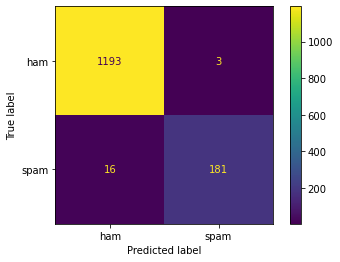

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

In [42]:
training_score = classifier.score(train_data, y_train)
test_score = classifier.score(test_data, y_test)
print(training_score)
print(test_score)

0.9928212491026561
0.9863603732950467


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label="spam")))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label="spam")))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label="spam")))

Accuracy score: 0.9863603732950467
Precision score: 0.9836956521739131
Recall score: 0.9187817258883249
F1 score: 0.9501312335958005


In [44]:
!pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 458 kB 2.8 MB/s eta 0:00:01


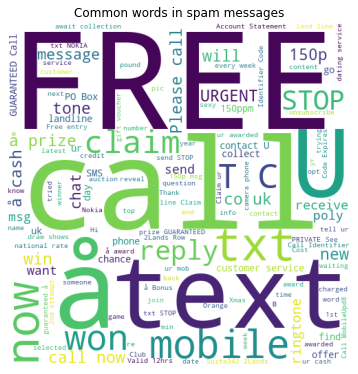

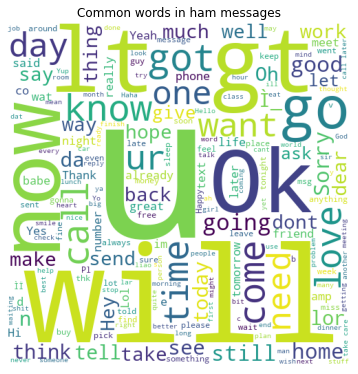

In [45]:

spam = df[df['label']=='spam']['sms'].str.cat(sep=', ')
ham = df[df['label']=='ham']['sms'].str.cat(sep=', ')
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')
spam_wc = wc.generate(spam)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0)
plt.show()
ham_wc = wc.generate(ham)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(ham_wc)

plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0)
plt.show()